# Image processing using FreeSurfer
<hr/>
***As-Is Software Disclaimer***

This content in this repository is delivered “As-Is”. Notwithstanding anything to the contrary, DNAnexus will have no warranty, support, liability or other obligations with respect to Materials provided hereunder.

<hr/>

This notebook demonstrates usage of the Image Processing package <a href="https://surfer.nmr.mgh.harvard.edu/fswiki/FreeSurferWiki">FreeSurfer</a> in the IMAGE_PROCESSING flavor of JupyterLab on the DNAnexus platform.

<a href="https://github.com/dnanexus/OpenBio/blob/master/LICENSE.md">MIT License</a> applies to this notebook.

## 1. Preparing your environment
### Launch spec:

* App name: JupyterLab with Python, R, Stata, ML, Image Processing
* App flavor: IMAGE_PROCESSING
* Kernel: Python
* Instance type: mem1_ssd1_v2_x16
* Runtime: =~ 30 min
* Data description: Input for this notebook is a T1-weighted MRI image. We are downloading the primer example data from <a href="https://www.fmrib.ox.ac.uk/primers/intro_primer/ExBox13/IntroBox13.html">Oxford NeuroImaging Primer</a>. The downloaded zipped folder (size ~30 MB) contains the following images: 
    * Original (non-brain-extracted) structural image: `T1.nii.gz`
    * Two brain extracted images: `T1_v1_brain.nii.gz` and `T1_v2_brain.nii.gz`

### FreeSurfer License

In order to use FreeSurfer, we need to generate a license and add it to the FreeSurfer Home directory. The license key registry page is <a href="https://surfer.nmr.mgh.harvard.edu/registration.html">here</a>.

Generate the license and upload it to the platform. Before running this notebook, download the license in the `FREESURFER_HOME` directory by running the following command:

In [1]:
! dx download license.txt -o $FREESURFER_HOME

### Alternatively, replace xxxx by project id and yyyy by file id
### of the license file and run this:
# dx download project-xxxx:file-yyyy -o $FREESURFER_HOME

[===========================================================>] Completed 59 of 59 bytes (100%) /usr/local/freesurfer/license.txtt


## 2. Download and Unzip data

In [2]:
# Download ExBox data
! wget https://www.fmrib.ox.ac.uk/primers/intro_primer/ExBox13/ExBox13.zip

--2022-08-03 21:26:52--  https://www.fmrib.ox.ac.uk/primers/intro_primer/ExBox13/ExBox13.zip
Resolving www.fmrib.ox.ac.uk (www.fmrib.ox.ac.uk)... 129.67.248.65
Connecting to www.fmrib.ox.ac.uk (www.fmrib.ox.ac.uk)|129.67.248.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31149300 (30M) [application/zip]
Saving to: ‘ExBox13.zip’

ExBox13.zip         100%[===================>]  29.71M  22.2MB/s    in 1.3s    

2022-08-03 21:26:54 (22.2 MB/s) - ‘ExBox13.zip’ saved [31149300/31149300]



Alternatively, we can also use DICOM images to run these analyses. To do so, we can download DICOM images from the FreeSurfer tutorial dataset.

In [3]:
# ! wget -r --no-parent https://surfer.nmr.mgh.harvard.edu/pub/data/tutorial_data/practice_with_data/dicoms/
# ! dx download -r dicoms

In [4]:
# Unzip ExBox data
! apt-get update
! apt-get install unzip
! unzip ExBox13.zip
! ls ExBox13/

Get:1 https://download.docker.com/linux/ubuntu bionic InRelease [64.4 kB]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]    
Get:3 https://download.docker.com/linux/ubuntu bionic/stable amd64 Packages [30.5 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic InRelease [242 kB]               
Get:5 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1527 kB]
Get:6 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2905 kB]
Get:7 http://security.ubuntu.com/ubuntu bionic-security/multiverse amd64 Packages [22.8 kB]
Get:8 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [1068 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]      
Get:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic/universe amd64 Packages [11.3 MB]
Get:12 http://archive.ubuntu.com/ubuntu bionic/restricted amd64 Packages [13.5 kB]

## 3. Import Packages

In [17]:
from nipype.interfaces import freesurfer
from nipype.interfaces.freesurfer import ReconAll
import nibabel as nib
import matplotlib.pyplot as plt
import os

## 4. Run `recon-all`
Running all the reconstruction steps of `recon-all` can take several hours, as mentioned in the <a href="https://surfer.nmr.mgh.harvard.edu/fswiki/recon-all#Step-wiseDirectives-1"> recon-all documentation</a>. Here, we run only the motion correction directive `autorecon1`, which takes ~ 15-25 minutes to complete.

In [7]:
subject_dir = "ExBox13"
if not os.path.exists(subject_dir):
    os.mkdir(subject_dir)
sub = "Subj001"
reconall = ReconAll()
reconall.inputs.subject_id = sub
reconall.inputs.directive = "autorecon1"
reconall.inputs.subjects_dir = subject_dir
reconall.inputs.T1_files = "ExBox13/T1.nii.gz"
print(reconall.cmdline)

recon-all -autorecon1 -i ExBox13/T1.nii.gz -subjid Subj001 -sd ExBox13


In [8]:
reconall.run()

220803-21:28:19,29 nipype.interface INFO:
	 stdout 2022-08-03T21:28:19.029672:Subject Stamp: freesurfer-linux-ubuntu18_x86_64-7.2.0-20210721-aa8f76b
220803-21:28:19,31 nipype.interface INFO:
	 stdout 2022-08-03T21:28:19.029672:Current Stamp: freesurfer-linux-ubuntu18_x86_64-7.2.0-20210721-aa8f76b
220803-21:28:19,44 nipype.interface INFO:
	 stdout 2022-08-03T21:28:19.044798:INFO: SUBJECTS_DIR is /opt/notebooks/ExBox13
220803-21:28:19,46 nipype.interface INFO:
	 stdout 2022-08-03T21:28:19.046257:Actual FREESURFER_HOME /usr/local/freesurfer
220803-21:28:19,63 nipype.interface INFO:
	 stdout 2022-08-03T21:28:19.063222:Linux 3e5a11f2b27d 5.4.0-1081-aws #88~18.04.1-Ubuntu SMP Thu Jun 23 16:29:17 UTC 2022 x86_64 x86_64 x86_64 GNU/Linux
220803-21:28:19,652 nipype.interface INFO:
	 stdout 2022-08-03T21:28:19.652218:/opt/notebooks/ExBox13/Subj001
220803-21:28:19,653 nipype.interface INFO:
	 stdout 2022-08-03T21:28:19.653721:
220803-21:28:19,654 nipype.interface INFO:
	 stdout 2022-08-03T21:28:19

## 5. Visualize results of `autorecon1`
### Load the input and out images
The `nib.load()` function returns an nibabel object and allows us to get metadata about the MRI image without loading the actual image into memory. The nibabel object generated above does not load the actual image data. We use the `get_fdata()` function to load the image array data.

In [15]:
# Input T1 file
t1 = nib.load("ExBox13/T1.nii.gz").get_fdata()

# Motion corrected image
motion_cor = nib.load("ExBox13/Subj001/mri/orig.mgz").get_fdata()

# Non-uniform Intensity corrected image
nu_intensity_cor = nib.load("ExBox13/Subj001/mri/orig_nu.mgz").get_fdata()

# Normalized image
normalized = nib.load("ExBox13/Subj001/mri/T1.mgz").get_fdata()

# Brainmask
brainmask = nib.load("ExBox13/Subj001/mri/brainmask.auto.mgz").get_fdata()

### Plot the images

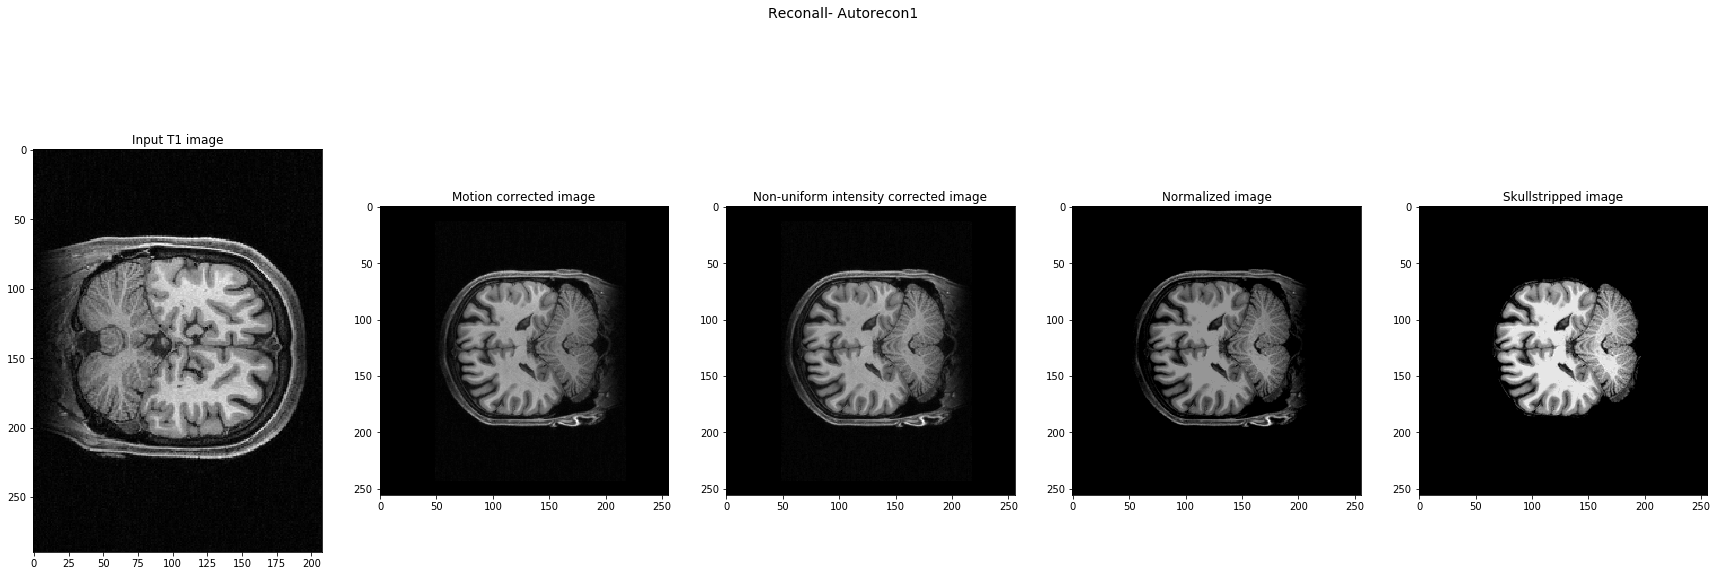

In [27]:
fig, ax = plt.subplots(1, 5, figsize=(30, 10))

fig.suptitle("Reconall- Autorecon1", fontsize=14)
ax[0].imshow(t1[:, 100, :], cmap="gray")
ax[0].set_title("Input T1 image")

ax[1].imshow(motion_cor[..., 100], cmap="gray")
ax[1].set_title("Motion corrected image")

ax[2].imshow(nu_intensity_cor[..., 100], cmap="gray")
ax[2].set_title("Non-uniform intensity corrected image")

ax[3].imshow(normalized[..., 100], cmap="gray")
ax[3].set_title("Normalized image")

ax[4].imshow(brainmask[..., 100], cmap="gray")
ax[4].set_title("Skullstripped image")

plt.show()